In [24]:
pip install xgboost

     |████████████████████████████████| 1.6 MB 4.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LinearRegression
from scipy.stats import iqr
from sklearn.utils import parallel_backend
from joblib import Parallel, delayed
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


In [2]:
# Load the data
tracks_spotify_df = pd.read_csv('./datasets/1/tracks.csv')
tracks_spotify_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [3]:
tracks_spotify_df.dtypes

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [4]:
tracks_spotify_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [5]:
tracks_spotify_df.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [6]:
# Create new column for year from release_date column, extract year from release_date
tracks_spotify_df['release_year'] = pd.to_datetime(tracks_spotify_df['release_date'], errors='coerce').dt.year

#map release year to decade
tracks_spotify_df['decade'] = (tracks_spotify_df['release_year'] // 10) * 10

#Change duration ms to seconds
tracks_spotify_df['duration_ms'] = tracks_spotify_df['duration_ms']/1000
#Normalize the tempo, loudness, and duration_ms column
tracks_spotify_df['tempo'] = (tracks_spotify_df['tempo'] - tracks_spotify_df['tempo'].mean()) / tracks_spotify_df['tempo'].std()
tracks_spotify_df['loudness'] = (tracks_spotify_df['loudness'] - tracks_spotify_df['loudness'].mean()) / tracks_spotify_df['loudness'].std()
tracks_spotify_df['duration_ms'] = (tracks_spotify_df['duration_ms'] - tracks_spotify_df['duration_ms'].mean()) / tracks_spotify_df['duration_ms'].std()
tracks_spotify_df['popularity'] = (tracks_spotify_df['popularity'] - tracks_spotify_df['popularity'].mean()) / tracks_spotify_df['popularity'].std()
tracks_spotify_df['time_signature'] = (tracks_spotify_df['time_signature'] - tracks_spotify_df['time_signature'].mean()) / tracks_spotify_df['time_signature'].std()

In [7]:
tracks_spotify_df.describe()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,release_year,decade
count,5.866720e+05,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,5.866720e+05,5.866720e+05,586672.000000,586672.000000
mean,-1.007670e-17,3.298180e-16,0.044086,0.563594,0.542036,5.221603,-3.689621e-16,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,2.910615e-16,-4.028741e-16,1988.566168,1983.982668
std,1.000000e+00,1.000000e+00,0.205286,0.166103,0.251923,3.519423,1.000000e+00,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,1.000000e+00,1.000000e+00,22.831283,22.956451
min,-1.500767e+00,-1.791782e+00,0.000000,0.000000,0.000000,0.000000,-9.783990e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.980125e+00,-8.186158e+00,1900.000000,1900.000000
25%,-7.931161e-01,-4.343623e-01,0.000000,0.453000,0.343000,2.000000,-5.275614e-01,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,-7.682023e-01,2.675986e-01,1974.000000,1970.000000
50%,-3.103064e-02,-1.198027e-01,0.000000,0.577000,0.549000,5.000000,1.892326e-01,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,-3.631409e-02,2.675986e-01,1992.000000,1990.000000
75%,7.310549e-01,2.672637e-01,0.000000,0.686000,0.748000,8.000000,7.317404e-01,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,5.999220e-01,2.675986e-01,2007.000000,2000.000000
max,3.942701e+00,4.260913e+01,1.000000,0.991000,1.000000,11.000000,3.061714e+00,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,4.297664e+00,2.381038e+00,2021.000000,2020.000000


In [8]:
tracks_spotify_df.dtypes

id                   object
name                 object
popularity          float64
duration_ms         float64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
release_year          int64
decade                int64
dtype: object

array([[<AxesSubplot: title={'center': 'popularity'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>,
        <AxesSubplot: title={'center': 'explicit'}>,
        <AxesSubplot: title={'center': 'danceability'}>],
       [<AxesSubplot: title={'center': 'energy'}>,
        <AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>,
        <AxesSubplot: title={'center': 'mode'}>],
       [<AxesSubplot: title={'center': 'speechiness'}>,
        <AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>,
        <AxesSubplot: title={'center': 'liveness'}>],
       [<AxesSubplot: title={'center': 'valence'}>,
        <AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: title={'center': 'release_year'}>],
       [<AxesSubplot: title={'center': 'decade'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

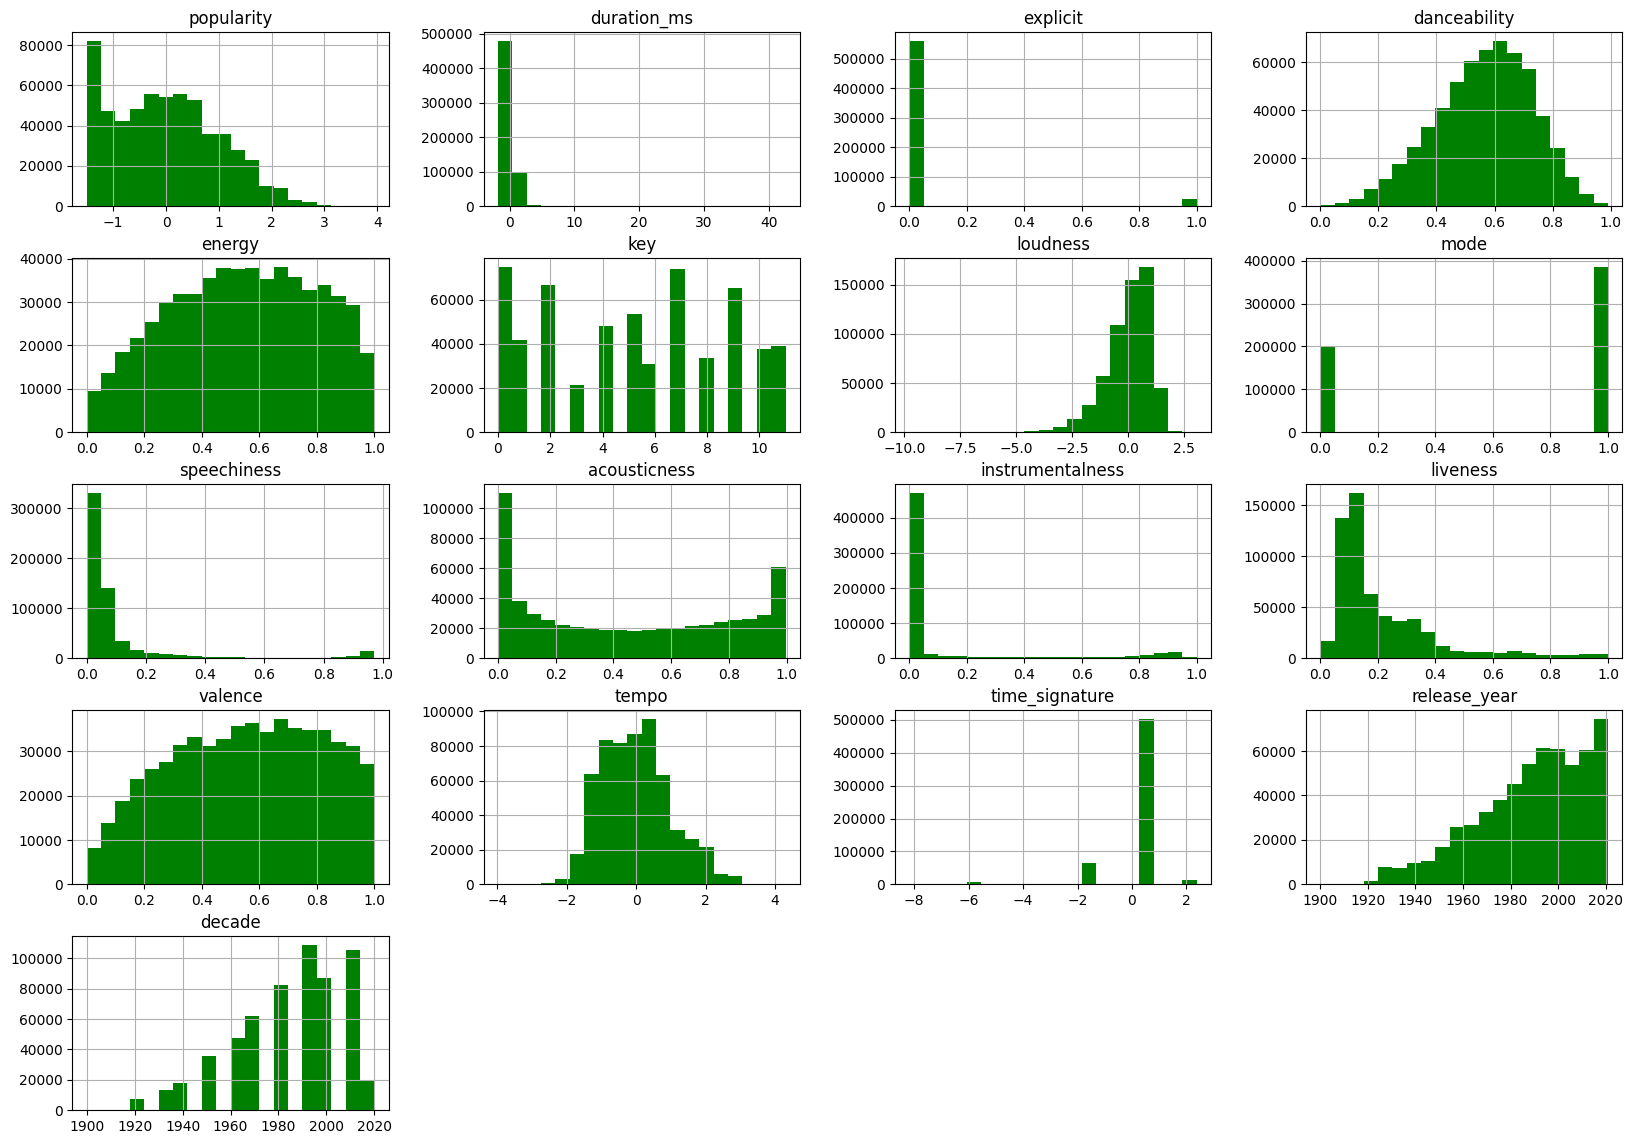

In [9]:
tracks_spotify_df.hist(bins = 20, color = 'green', figsize = (20, 14))

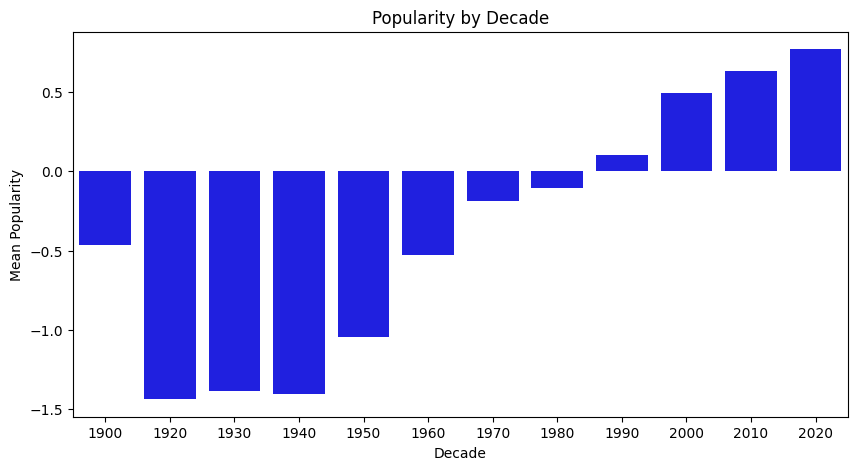

In [10]:
popularity_by_decade = tracks_spotify_df.groupby('decade')['popularity'].mean().reset_index()

# Popularity by decade
plt.figure(figsize=(10,5))
sns.barplot(x='decade', y='popularity', data=popularity_by_decade, color='blue')
plt.title('Popularity by Decade')
plt.xlabel('Decade')
plt.ylabel('Mean Popularity')
plt.show()


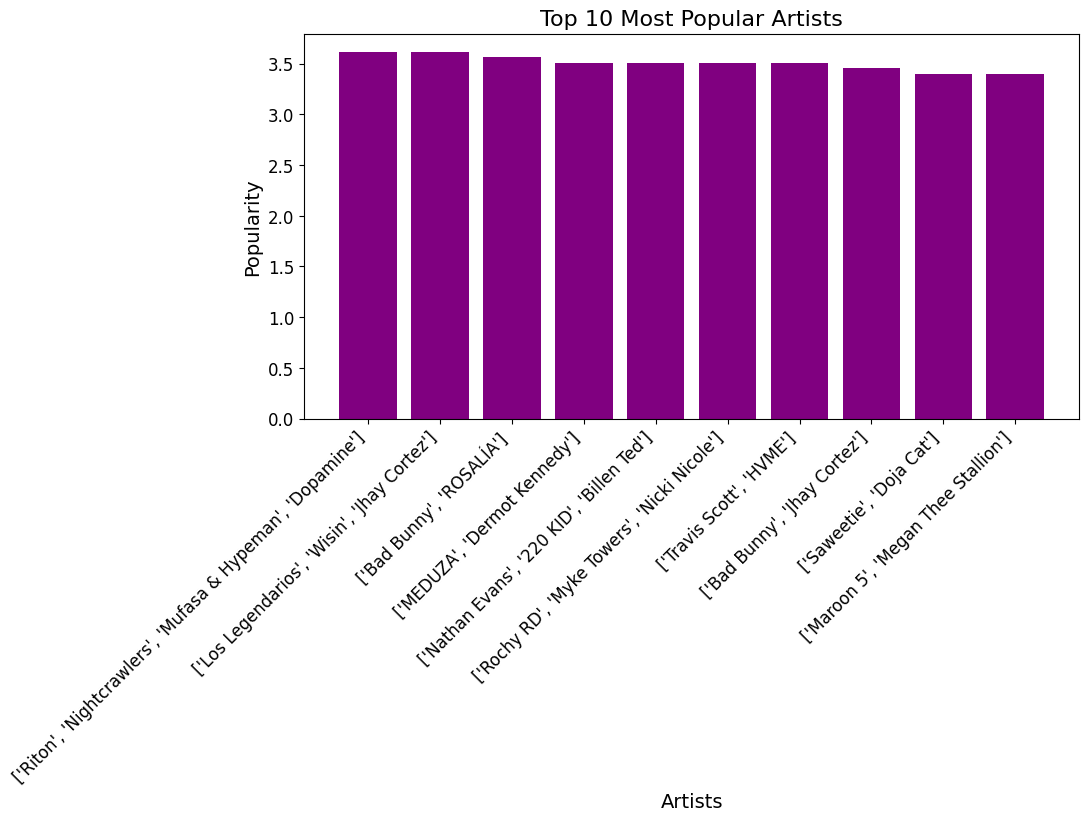

In [11]:
# Group by artist and calculate the mean popularity
artists_popularity = tracks_spotify_df.groupby('artists')['popularity'].mean().sort_values(ascending=False)[:10]

# Create a bar plot
plt.figure(figsize=(10, 5))
plt.bar(artists_popularity.index, artists_popularity.values, color='purple')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Artists', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Top 10 Most Popular Artists', fontsize=16)
plt.show()



/var/folders/63/svnqmgb111qc2f3w5dm99tw80000gn/T/ipykernel_22920/2003615396.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = tracks_spotify_df.corr()


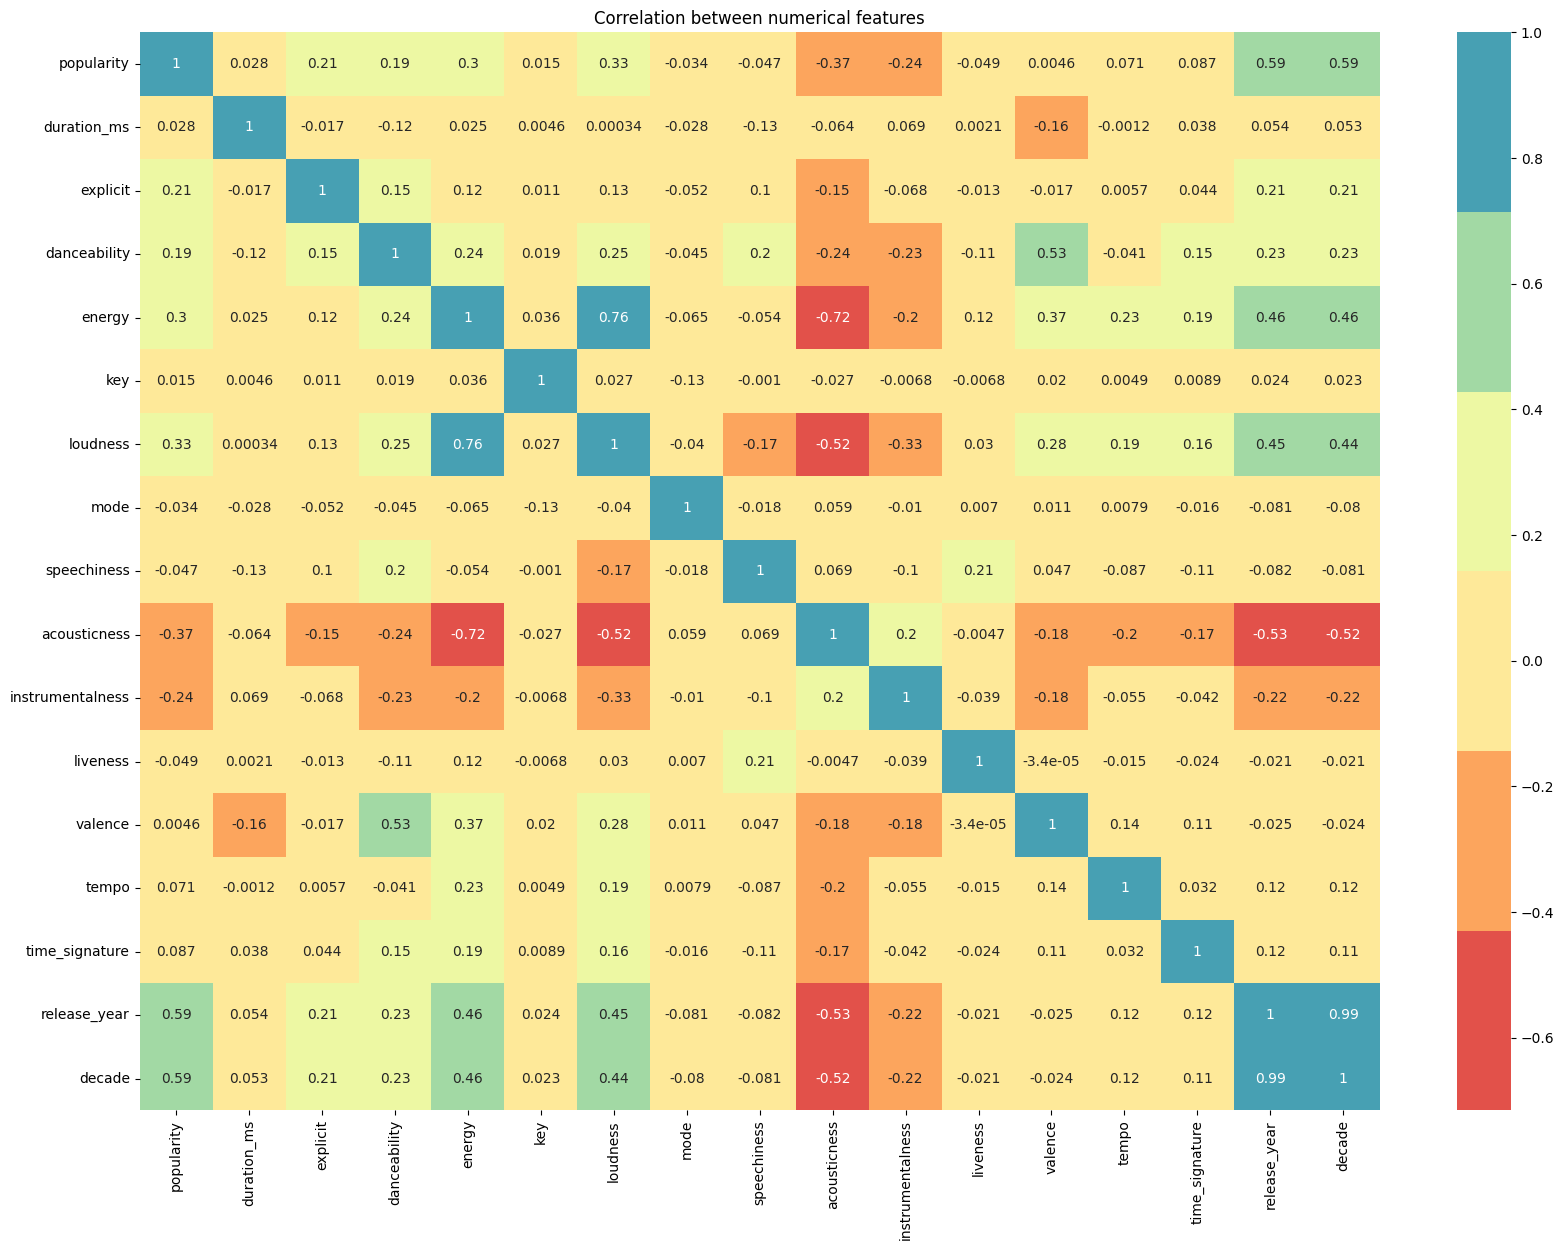

In [12]:
plt.figure(figsize = (20, 14))
# Correlation of each data focused on release_year as that will be our response variable
cmap = sns.color_palette('Spectral')
corr_mat = tracks_spotify_df.corr()
sns.heatmap(corr_mat, annot = True, cmap = cmap)
plt.title('Correlation between numerical features')
plt.show()


In [13]:
#Dropping the columns which are not much of correlated with the release_year
tracks_spotify_df_final = tracks_spotify_df.drop(columns=['time_signature', 'id_artists', 'id', 'artists', 'release_date', 'name', 'explicit'])
tracks_spotify_df_final.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,decade
0,-1.174159,-0.815232,0.645,0.4450,0,-0.615392,1,0.4510,0.674,0.7440,0.151,0.127,-0.457392,1922,1920
1,-1.500767,-1.042087,0.695,0.2630,0,-2.344108,1,0.9570,0.797,0.0000,0.148,0.655,-0.552876,1922,1920
2,-1.500767,-0.382618,0.434,0.1770,1,-2.156264,1,0.0512,0.994,0.0218,0.212,0.457,0.401596,1922,1920
3,-1.500767,-0.420025,0.321,0.0946,7,-3.488660,1,0.0504,0.995,0.9180,0.104,0.397,1.730781,1922,1920
4,-1.500767,-0.529307,0.402,0.1580,3,-1.315288,0,0.0390,0.989,0.1300,0.311,0.196,-0.512189,1922,1920


In [14]:
tracks_spotify_df_final.columns

Index(['popularity', 'duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'release_year', 'decade'],
      dtype='object')

In [15]:
tracks_spotify_df_final.isna().sum()

popularity          0
duration_ms         0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
release_year        0
decade              0
dtype: int64

In [16]:
tracks_spotify_df_final['decade'].unique()

array([1920, 1930, 1940, 1950, 1960, 2000, 2020, 2010, 1990, 1970, 1980,
       1900])

In [17]:
# Split into train and test datasets
X = tracks_spotify_df_final.drop(columns=['release_year', 'decade'] , axis=1)
y = tracks_spotify_df_final['decade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
#Linear Regression model
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
y_pred_lm = lm_model.predict(X_test)

# Round the values to the nearest decade
y_pred_lm = (np.round(y_pred_lm * 10.0) / 10.0).astype(int)

In [19]:
print('Linear Regression Model')
print('MSE: ', mean_squared_error(y_test, y_pred_lm))
print('R^2: ', r2_score(y_test, y_pred_lm))
print('Accuracy: ', accuracy_score(y_test, y_pred_lm))

Linear Regression Model
MSE:  259.28318996375043
R^2:  0.5086475580685474
Accuracy:  0.025908796490948967


In [20]:
#Decision Tree model 
dt_model = DecisionTreeClassifier(max_depth=50, random_state=42, criterion='entropy')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [21]:
#Print the accuracy of the model
print('Decision Tree Model')
print('MSE: ', mean_squared_error(y_test, y_pred_dt))
print('R^2: ', r2_score(y_test, y_pred_dt))
print('Accuracy: ', accuracy_score(y_test, y_pred_dt))


Decision Tree Model
MSE:  330.55760729991704
R^2:  0.37357956924033575
Accuracy:  0.33296212543039283


In [21]:
# Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators = 300,max_features = 'sqrt',
                                        max_depth = 70,
                                        min_samples_leaf = 3,
                                        min_samples_split = 2,
                                        criterion = 'entropy',
                                        bootstrap = True,
                                        random_state = 42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [22]:
print('Random Forest Model')
print('MSE: ', mean_squared_error(y_test, y_pred_rf))
print('R^2: ', r2_score(y_test, y_pred_rf))
print('Accuracy: ', accuracy_score(y_test, y_pred_rf))

Random Forest Model
MSE:  205.5152782354746
R^2:  0.6105399897720323
Accuracy:  0.46090385336530265


In [28]:
xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42)

le = LabelEncoder()
y_train_xgb = le.fit_transform(y_train)

xgb_model.fit(X_train, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test)

In [30]:
y_test_xgb = le.fit_transform(y_test)

print('XG Boost Model')
print('MSE: ', mean_squared_error(y_test_xgb, y_pred_xgb))
print('R^2: ', r2_score(y_test_xgb, y_pred_xgb))
print('Accuracy: ', accuracy_score(y_test_xgb, y_pred_xgb))

XG Boost Model
MSE:  3.2228724673583256
R^2:  0.3892522468997883
Accuracy:  0.16645833570073068


In [24]:
#SVM Model
svm_model = svm.SVC(kernel='linear', verbose=True, random_state=42, cache_size=7000)

In [ ]:
# Use joblib to parallelize the model training
# with parallel_backend('threading', n_jobs=-1):
svm_model.fit(X_train, y_train)

[LibSVM]*
optimization finished, #iter = 195
obj = -1.832234, rho = 1.251126
nSV = 9, nBSV = 1
*
optimization finished, #iter = 432
obj = -1.948305, rho = 1.283034
nSV = 9, nBSV = 1
*
optimization finished, #iter = 367
obj = -1.945225, rho = 1.263102
nSV = 10, nBSV = 1
*
optimization finished, #iter = 987
obj = -1.995732, rho = 1.070110
nSV = 13, nBSV = 1
.
*..
*
optimization finished, #iter = 3159
obj = -1.999605, rho = 1.017122
nSV = 17, nBSV = 1
*..
*.
*
optimization finished, #iter = 2140
obj = -1.999947, rho = 1.003700
nSV = 31, nBSV = 1
*
optimization finished, #iter = 553
obj = -1.999926, rho = 1.002017
nSV = 39, nBSV = 1
*
optimization finished, #iter = 558
obj = -1.999917, rho = 1.006571
nSV = 55, nBSV = 1
*
optimization finished, #iter = 375
obj = -1.999893, rho = 1.004009
nSV = 45, nBSV = 1
*
optimization finished, #iter = 874
obj = -1.999908, rho = 1.008193
nSV = 40, nBSV = 1
.
*.
*.
*
optimization finished, #iter = 2479
obj = -1.999853, rho = 1.007206
nSV = 35, nBSV = 1
..

....................
*..................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
y_pred_svm = svm_model.predict(X_test)


In [ ]:
#Print the accuracy of the model
print('SVM Model')
print('MSE: ', mean_squared_error(y_test, y_pred_svm))
print('R^2: ', r2_score(y_test, y_pred_svm))
print('Accuracy: ', accuracy_score(y_test, y_pred_svm))
